# <span style="color:#7579e7"> <center> DSIM, Assignment 2 - AA 2020/2021 </center>

> <span style="color:#9ab3f5">**Studente**:</span> Campironi Matteo
>
> <span style="color:#9ab3f5">**Matricola**:</span> 801850

<span style="color:#9ab3f5">**Assignment**:</span>

1. Choose a new different image
2. Convert into YCbCr color space
3. Blur Cb and Cr channels using a wide gaussian filter
4. Visualize each channel of the YCbCr, and the rebuilt resulting RGB image
5. Blur only the Y channel (and keep the original Cb and Cr)
6. Visualize each channel of the YCbCr, and the rebuilt resulting RGB image

You can test with different sizes of the gaussian filter to appreciate the degree of tolerance of the human eye to color compression.

In [165]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

from skimage import io 
from skimage import transform 
from skimage import filters 
from skimage import color 

### <span style="color:#7579e7"> 1. Choose a new different image

In [2]:
im = io.imread('DSIM3.jpg')

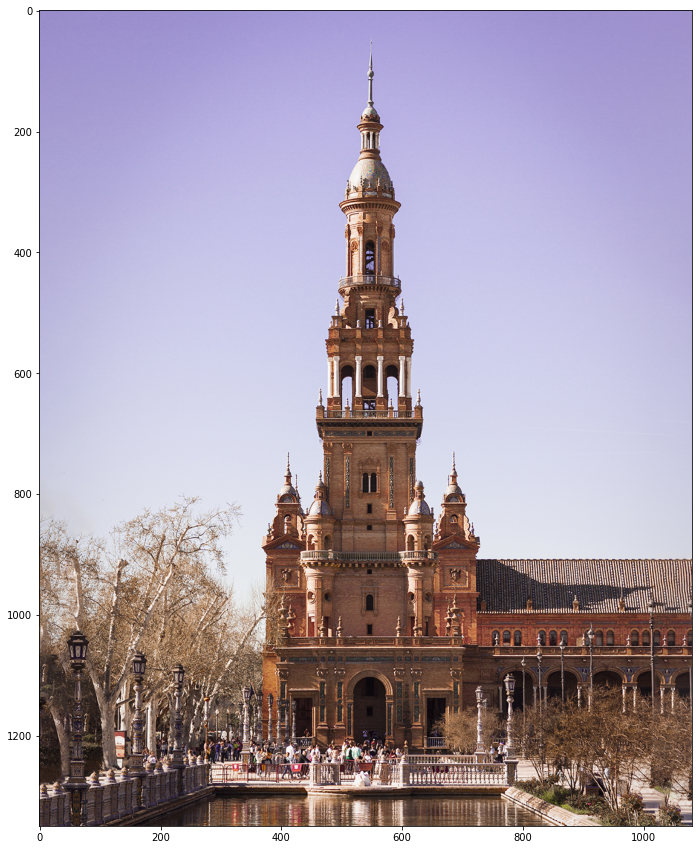

In [3]:
plt.figure(figsize = (15,15))
plt.imshow(im); plt.clim(0,1); plt.show()

### <span style="color:#7579e7"> 2. Convert into YCbCr color space

Utilizziamo la funzione `rgb2ycbcr()` per passare dallo spazio colore RGB al YCbCr. Creiamo tre immagini uguali, in modo da poter applicare diversi filtri gaussiani successivamente.

In [175]:
im_YCbCr1 = color.rgb2ycbcr(im)
im_YCbCr2 = color.rgb2ycbcr(im)
im_YCbCr3 = color.rgb2ycbcr(im)

Visualizziamo i tre canali Y, Cb e Cr:

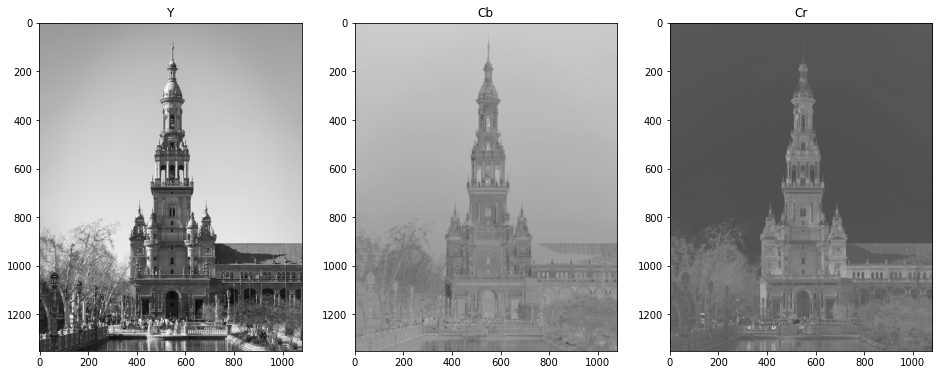

In [125]:
plt.figure(figsize = (16,16))
plt.subplot(1,3,1); plt.imshow(im_YCbCr1[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2); plt.imshow(im_YCbCr1[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(im_YCbCr1[:,:,2], cmap='gray'); plt.title('Cr')
plt.show()

### <span style="color:#7579e7"> 3. Blur Cb and Cr channels using a wide gaussian filter

Proviamo ad utilizzare filtri gaussiani diversi sui canali Cb e Cr, partendo da una sfocatura più leggera fino ad una accentuata:

In [126]:
im_YCbCr1[:,:,1] = filters.gaussian(im_YCbCr1[:,:,1],sigma=(5, 5))
im_YCbCr1[:,:,2] = filters.gaussian(im_YCbCr1[:,:,2],sigma=(5, 5))

In [127]:
im_YCbCr2[:,:,1] = filters.gaussian(im_YCbCr2[:,:,1],sigma=(10, 10))
im_YCbCr2[:,:,2] = filters.gaussian(im_YCbCr2[:,:,2],sigma=(10, 10))

In [128]:
im_YCbCr3[:,:,1] = filters.gaussian(im_YCbCr3[:,:,1],sigma=(20, 20))
im_YCbCr3[:,:,2] = filters.gaussian(im_YCbCr3[:,:,2],sigma=(20, 20))

### <span style="color:#7579e7"> 4. Visualize each channel of the YCbCr, and the rebuilt resulting RGB image

Visualizziamo l'effetto dei filtri sui canali Cb e Cr delle tre immagini:

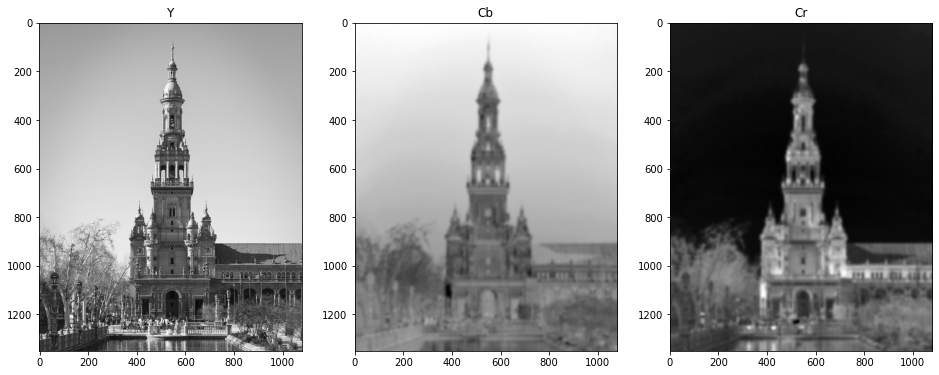

In [20]:
plt.figure(figsize = (16,16))
plt.subplot(1,3,1); plt.imshow(im_YCbCr1[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2); plt.imshow(im_YCbCr1[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(im_YCbCr1[:,:,2], cmap='gray'); plt.title('Cr')
plt.show()

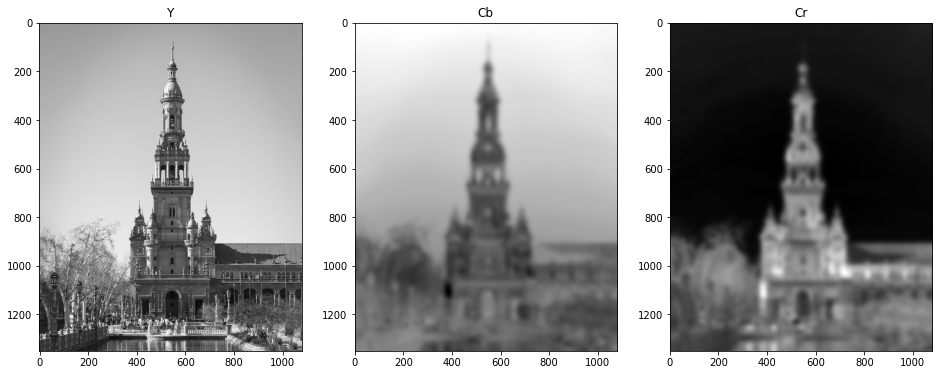

In [21]:
plt.figure(figsize = (16,16))
plt.subplot(1,3,1); plt.imshow(im_YCbCr2[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2); plt.imshow(im_YCbCr2[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(im_YCbCr2[:,:,2], cmap='gray'); plt.title('Cr')
plt.show()

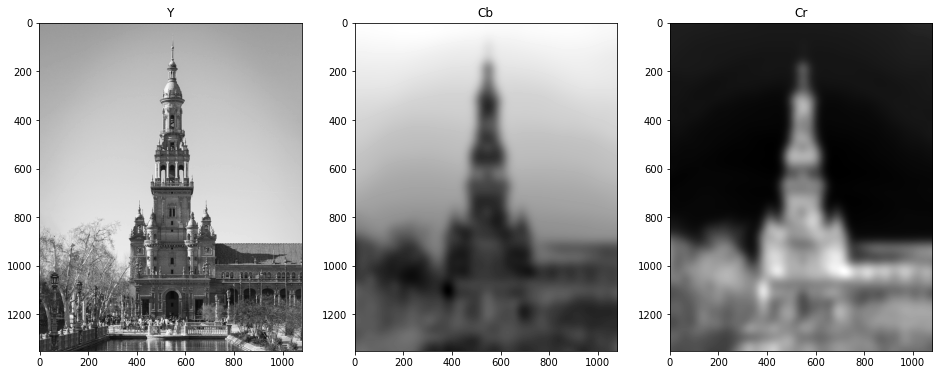

In [22]:
plt.figure(figsize = (16,16))
plt.subplot(1,3,1); plt.imshow(im_YCbCr3[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2); plt.imshow(im_YCbCr3[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(im_YCbCr3[:,:,2], cmap='gray'); plt.title('Cr')
plt.show()

Torniamo allo spazio colore RGB dal YCbCr utilizzando la funzione inversa `ycbcr2rgb()`:

In [154]:
im_final1 = color.ycbcr2rgb(im_YCbCr1)
im_final2 = color.ycbcr2rgb(im_YCbCr2)
im_final3 = color.ycbcr2rgb(im_YCbCr3)

Visualizziamo le tre immagini:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


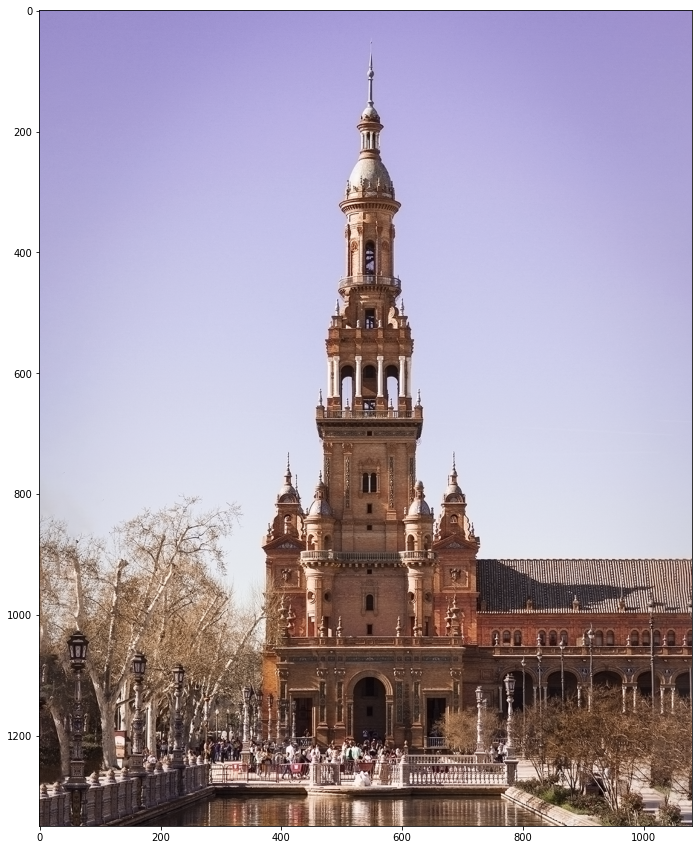

In [173]:
plt.figure(figsize = (15,15))
plt.imshow(im_final1, norm=norm); plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


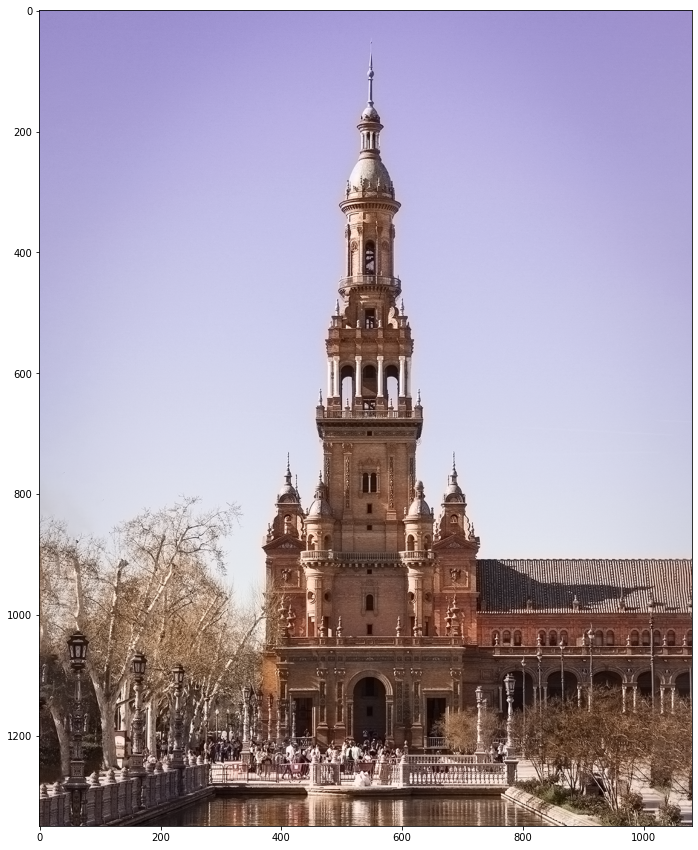

In [174]:
plt.figure(figsize = (15,15))
plt.imshow(im_final2); plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


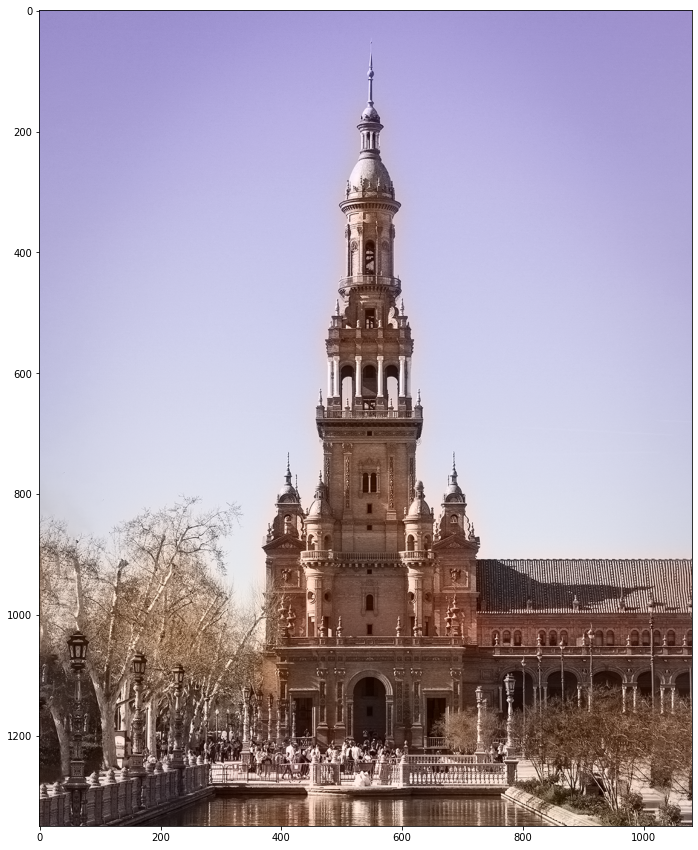

In [27]:
plt.figure(figsize = (15,15))
plt.imshow(im_final3); plt.show()

Come è possibile osservare, aumentando l'intensità del filtro gaussiano si ha una maggiore perdita dei dettagli dell'immagine, ma il suo contenuto rimane comunque apprezzabile.

### <span style="color:#7579e7"> 5. Blur only the Y channel (and keep the original Cb and Cr)

Proviamo ora a ripetere quanto fatto, concentrandoci però sul canale Y.

Creiamo come prima tre immagini da quella di partenza, portandoci nello spazio colore YCbCr:

In [187]:
im_YCbCr1 = color.rgb2ycbcr(im)
im_YCbCr2 = color.rgb2ycbcr(im)
im_YCbCr3 = color.rgb2ycbcr(im)

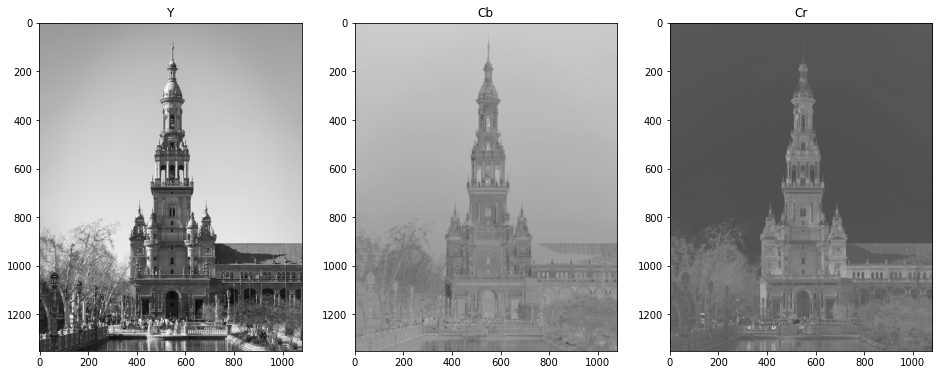

In [188]:
plt.figure(figsize = (16,16))
plt.subplot(1,3,1); plt.imshow(im_YCbCr1[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2); plt.imshow(im_YCbCr1[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(im_YCbCr1[:,:,2], cmap='gray'); plt.title('Cr')
plt.show()

Applichiamo i diversi filtri gaussiani sul canale Y:

In [189]:
im_YCbCr1[:,:,0] = filters.gaussian(im_YCbCr1[:,:,0],sigma=(5, 5))
im_YCbCr2[:,:,0] = filters.gaussian(im_YCbCr2[:,:,0],sigma=(10, 10))
im_YCbCr3[:,:,0] = filters.gaussian(im_YCbCr3[:,:,0],sigma=(20, 20))

### <span style="color:#7579e7"> 6. Visualize each channel of the YCbCr, and the rebuilt resulting RGB image

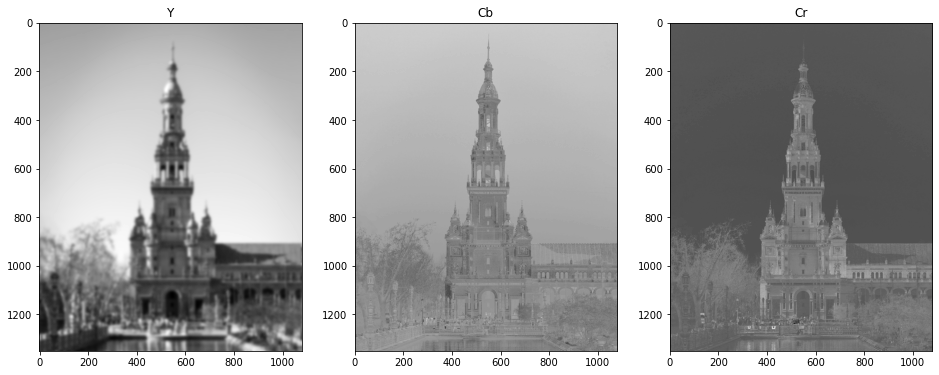

In [190]:
plt.figure(figsize = (16,16))
plt.subplot(1,3,1); plt.imshow(im_YCbCr1[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2); plt.imshow(im_YCbCr1[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(im_YCbCr1[:,:,2], cmap='gray'); plt.title('Cr')
plt.show()

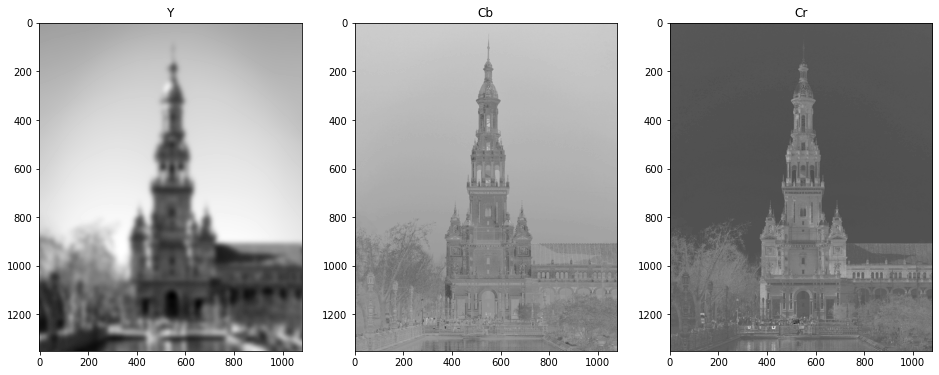

In [191]:
plt.figure(figsize = (16,16))
plt.subplot(1,3,1); plt.imshow(im_YCbCr2[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2); plt.imshow(im_YCbCr2[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(im_YCbCr2[:,:,2], cmap='gray'); plt.title('Cr')
plt.show()

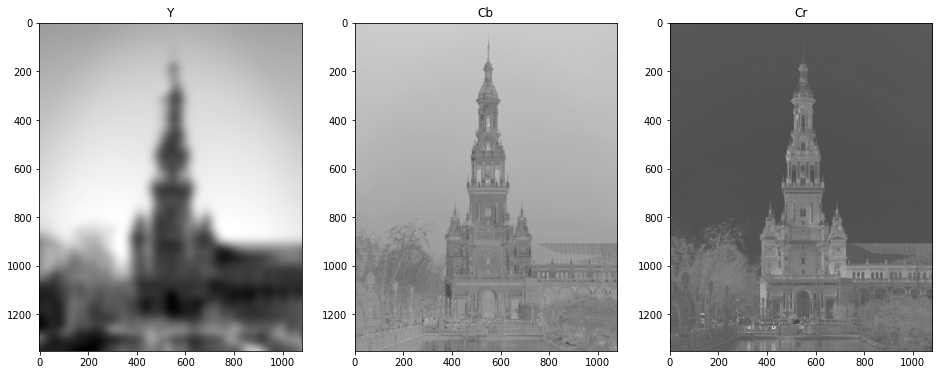

In [192]:
plt.figure(figsize = (16,16))
plt.subplot(1,3,1); plt.imshow(im_YCbCr3[:,:,0], cmap='gray'); plt.title('Y')
plt.subplot(1,3,2); plt.imshow(im_YCbCr3[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(im_YCbCr3[:,:,2], cmap='gray'); plt.title('Cr')
plt.show()

Torniamo nello spazio colore RGB

In [193]:
im_final1 = color.ycbcr2rgb(im_YCbCr1)
im_final2 = color.ycbcr2rgb(im_YCbCr2)
im_final3 = color.ycbcr2rgb(im_YCbCr3)

Visualizziamo le tre immagini:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


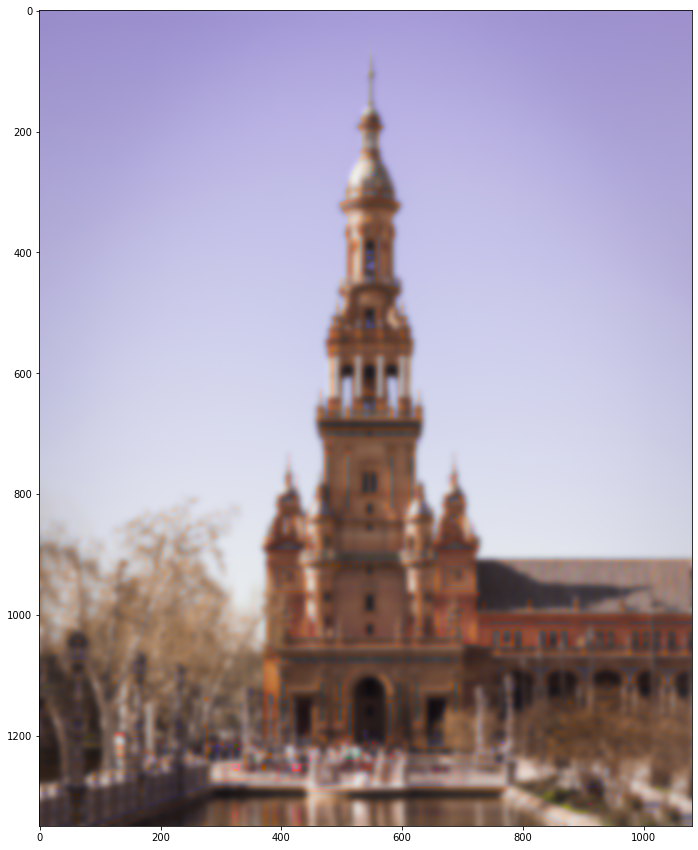

In [194]:
plt.figure(figsize = (15,15))
plt.imshow(im_final1); plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


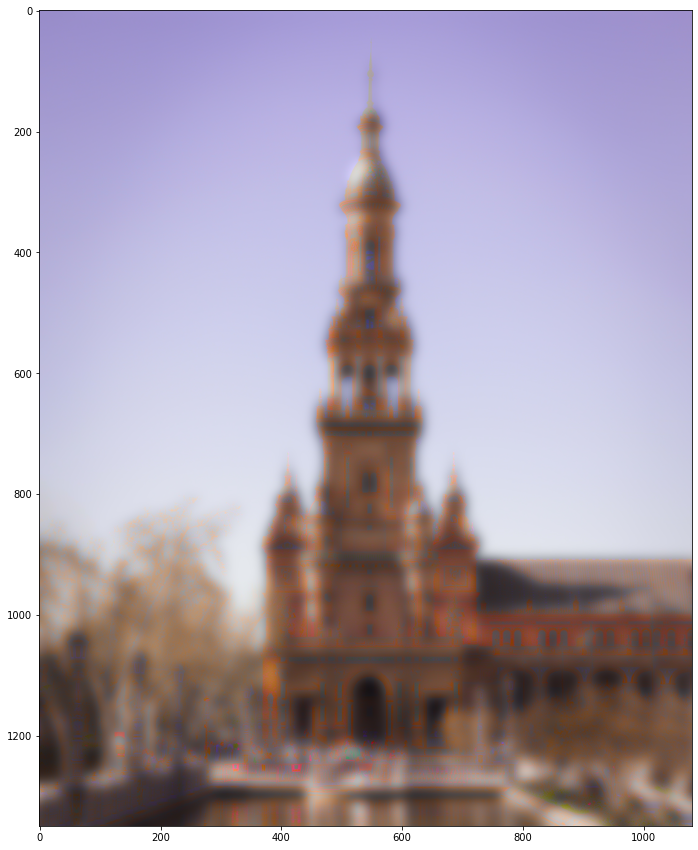

In [195]:
plt.figure(figsize = (15,15))
plt.imshow(im_final2); plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


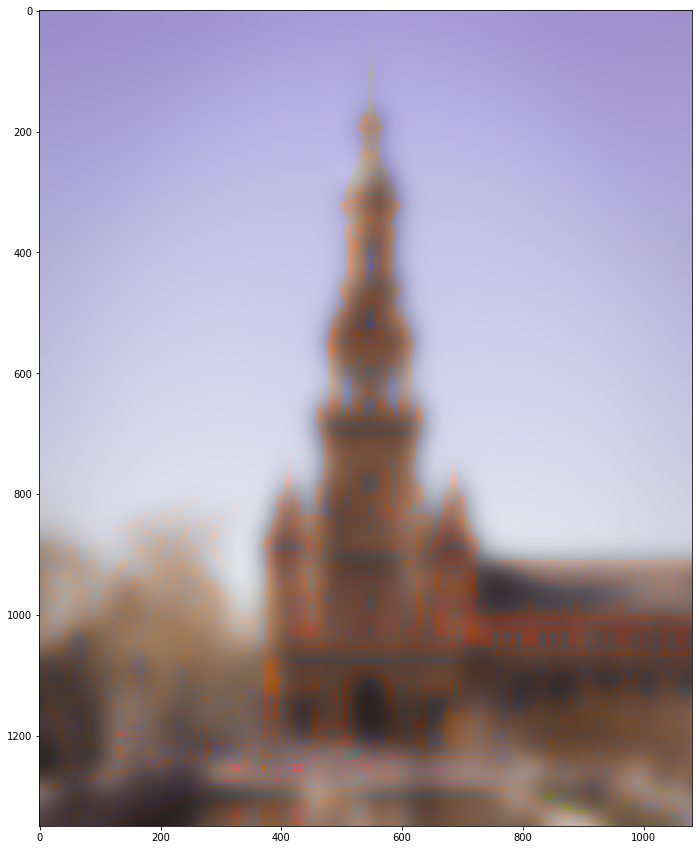

In [196]:
plt.figure(figsize = (15,15))
plt.imshow(im_final3); plt.show()

Andando ad applicare un filtro gaussiano sul canale Y possiamo osservare come già a partire dalla prima immagine questa appaia sfocata e abbia perso gran parte dei dettagli. Andando ad aumentare l'intensità del filtro questo fenomeno è sempre più marcato.